In [374]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
# Read datasets
data = pd.read_csv('./InflationIndicator_pro.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              10023 non-null  int64  
 1   month             10023 non-null  int64  
 2   day               10023 non-null  int64  
 3   USD_EUR_value     10023 non-null  int64  
 4   USD_EGP           10023 non-null  float64
 5   EUR_EGP           10022 non-null  float64
 6   cpi_rate          10023 non-null  float64
 7   cpi_base_2010     10023 non-null  float64
 8   RealInterestRate  10023 non-null  float64
 9   InterestRate      10023 non-null  float64
 10  XAU_Price         10023 non-null  float64
 11  gdp_rate          10023 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 939.8 KB


[99.89021706289283, 99.59430874444932, 99.85302207915142]


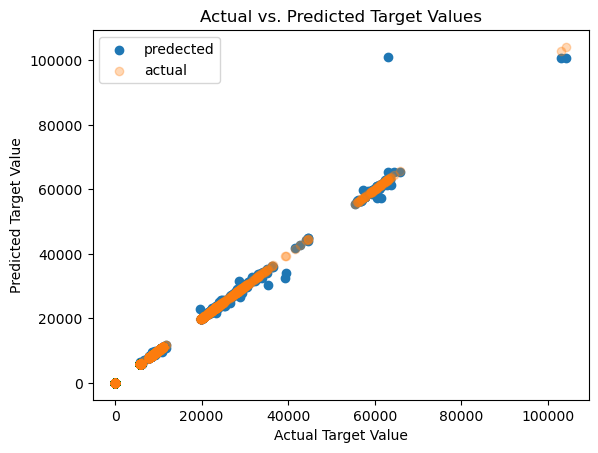

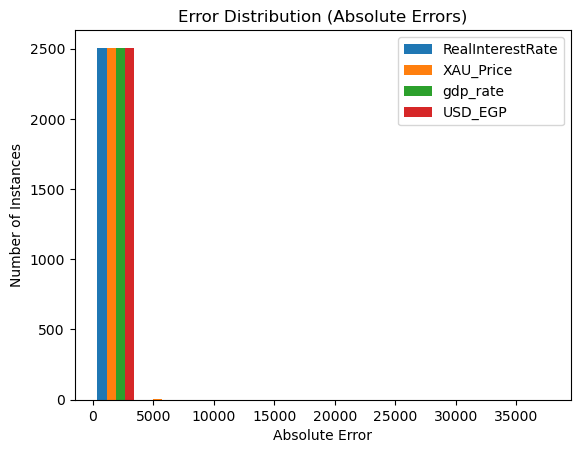

In [375]:
from sklearn.tree import DecisionTreeRegressor


target_features = ["RealInterestRate","XAU_Price","gdp_rate","USD_EGP"]
target = data[target_features]
X = ["year","month","day"]
x = data[X]
train_X, val_X, train_y, val_y = train_test_split(x, target, random_state = 0)
# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)
# Fit model
melbourne_model.fit(train_X, train_y)
# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
a = [
    (1-mean_absolute_percentage_error(val_y, val_predictions))*100,
    (1-np.sqrt(mean_squared_error(val_y, val_predictions))/(val_predictions.max()-val_predictions.min()))*100,
    r2_score(val_y, val_predictions)*100
]
print(a)

plt.scatter(val_y, val_predictions,label="predected")
plt.scatter(val_y, val_y,alpha=0.3, label="actual")
plt.xlabel("Actual Target Value")
plt.ylabel("Predicted Target Value")
plt.title("Actual vs. Predicted Target Values")
plt.legend()
plt.show()


# Plot the error distribution (absolute errors)


errors = np.abs(val_y - val_predictions)
plt.hist(errors,label=target_features)
plt.xlabel("Absolute Error")
plt.ylabel("Number of Instances")
plt.title("Error Distribution (Absolute Errors)")
plt.legend()
plt.show()

[99.88818126061396, 99.60122797782496, 99.8489252622358]


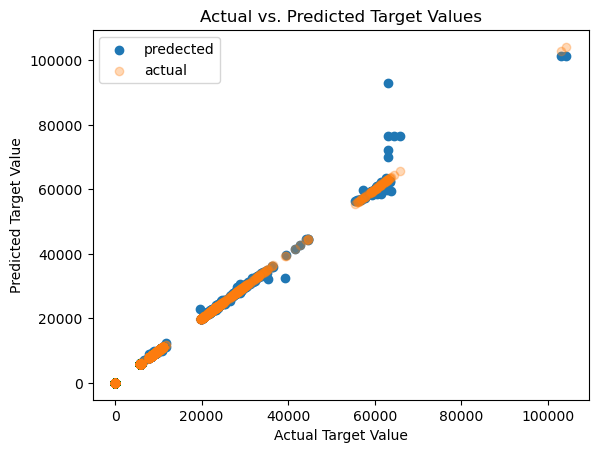

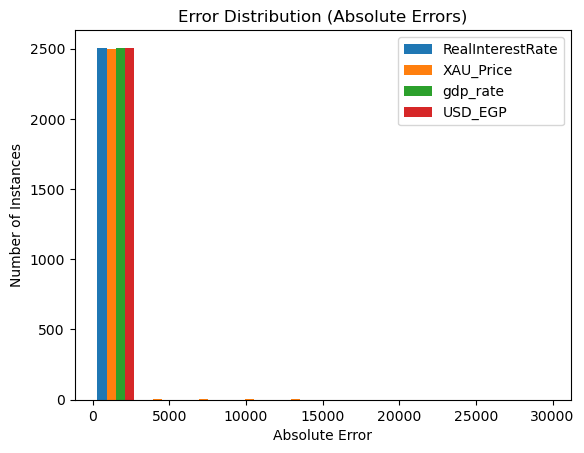

In [376]:
from sklearn.ensemble import RandomForestRegressor

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
# Define model
melbourne_model = RandomForestRegressor(random_state=1)
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)

b = [
    (1-mean_absolute_percentage_error(val_y, val_predictions))*100,
    (1-np.sqrt(mean_squared_error(val_y, val_predictions))/(val_predictions.max()-val_predictions.min()))*100,
    r2_score(val_y, val_predictions)*100
]
print(b)

plt.scatter(val_y, val_predictions,label="predected")
plt.scatter(val_y, val_y,alpha=0.3, label="actual")
plt.xlabel("Actual Target Value")
plt.ylabel("Predicted Target Value")
plt.title("Actual vs. Predicted Target Values")
plt.legend()
plt.show()

errors = np.abs(val_y - val_predictions)
plt.hist(errors,label=target_features)
plt.xlabel("Absolute Error")
plt.ylabel("Number of Instances")
plt.title("Error Distribution (Absolute Errors)")
plt.legend()
plt.show()

[99.90952114814783, 99.64969293631906, 99.87537563177574]


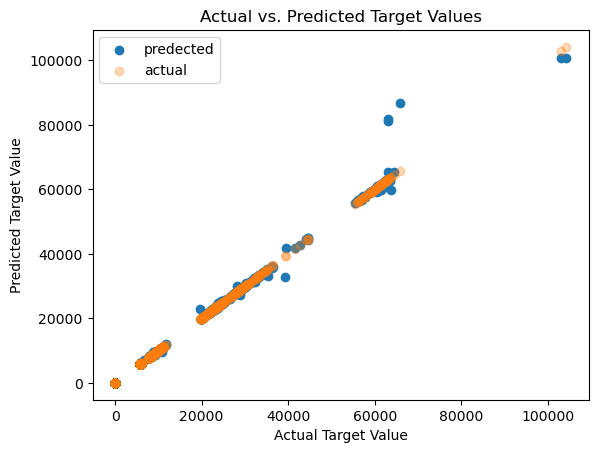

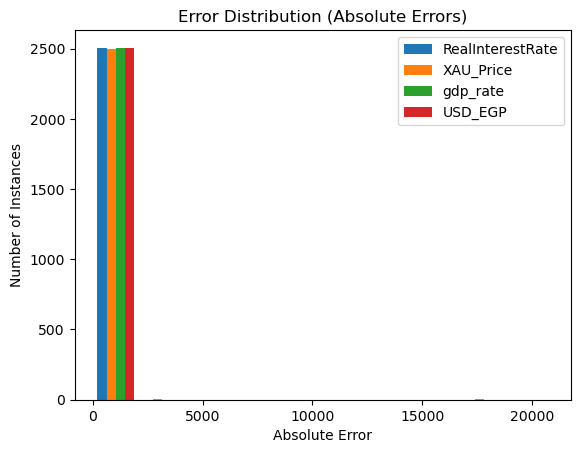

In [377]:
from sklearn.ensemble import ExtraTreesRegressor

clf = ExtraTreesRegressor(random_state=1)

clf.fit(train_X, train_y)

val_predictions = clf.predict(val_X)

c = [
    (1-mean_absolute_percentage_error(val_y, val_predictions))*100,
    (1-np.sqrt(mean_squared_error(val_y, val_predictions))/(val_predictions.max()-val_predictions.min()))*100,
    r2_score(val_y, val_predictions)*100
]
print(c)

plt.scatter(val_y, val_predictions,label="predected")
plt.scatter(val_y, val_y,alpha=0.3, label="actual")
plt.xlabel("Actual Target Value")
plt.ylabel("Predicted Target Value")
plt.title("Actual vs. Predicted Target Values")
plt.legend()
plt.show()

errors = np.abs(val_y - val_predictions)
plt.hist(errors,label=target_features)
plt.xlabel("Absolute Error")
plt.ylabel("Number of Instances")
plt.title("Error Distribution (Absolute Errors)")
plt.legend()
plt.show()

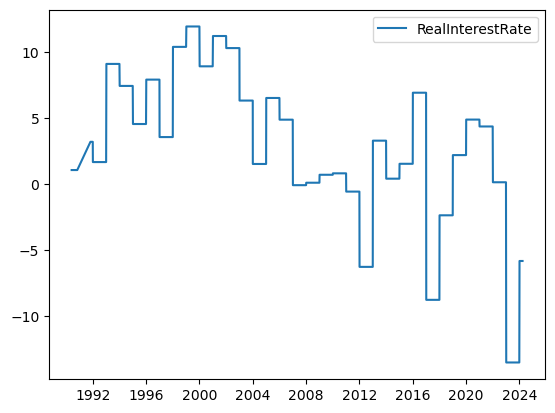

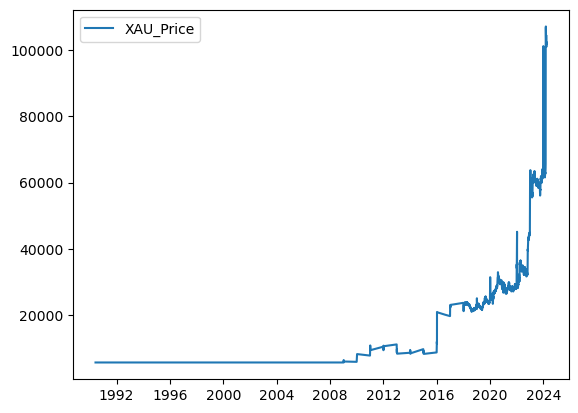

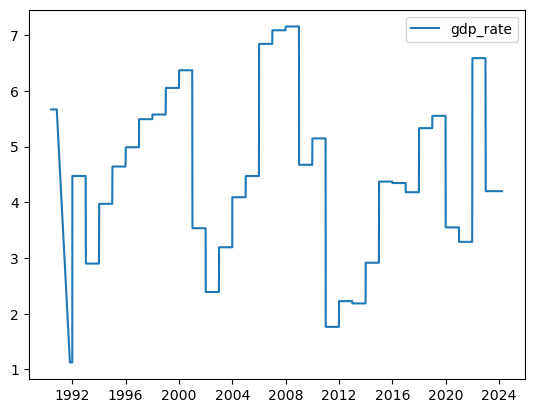

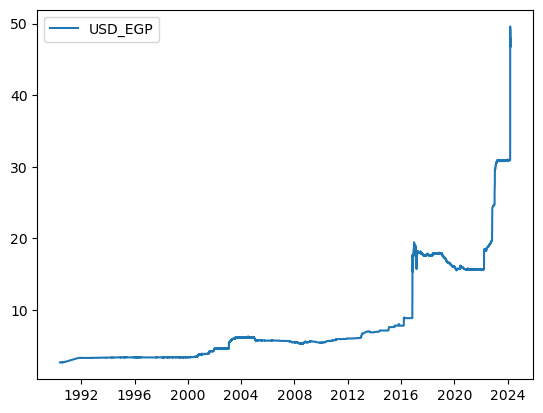

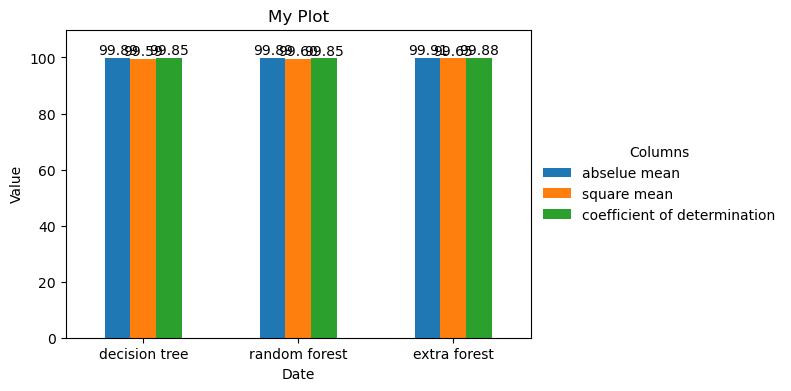

In [378]:
df = data['year'].astype(str) + '/' + data['month'].astype(str) + '/' + data['day'].astype(str)
z = pd.to_datetime(df)

for i in range (4):
    plt.plot(z, target[target_features[i]],label=target_features[i])
    plt.legend(loc='best')
    plt.show()

mad = pd.DataFrame({"abselue mean":[a[0],b[0],c[0]],
                    "square mean":[a[1],b[1],c[1]],
                    "coefficient of determination":[a[2],b[2],c[2]]},
                    index=["decision tree","random forest","extra forest"]
)



# plot bars or kind='barh' for horizontal bars; adjust figsize accordingly
ax = mad.plot(kind='bar', rot=0, xlabel='Date', ylabel='Value', title='My Plot', figsize=(6, 4))

# add some labels
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%0.2f', label_type='edge')
    
# add a little space at the top of the plot for the annotation
ax.margins(y=0.1)

# move the legend out of the plot
ax.legend(title='Columns', bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)